In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score

import seaborn as sb

In [2]:
chromConvert = {'chr_01': 1, 
               'chr_02': 2, 
               'chr_03': 3, 
               'chr_04': 4, 
               'chr_05': 5, 
               'chr_06': 6, 
               'chr_07': 7, 
               'chr_08': 8, 
               'chr_09': 9, 
               'chr_10': 10, 
               'chr_11': 11, 
               'chr_12': 12, 
               'chr_13': 13, 
               'chr_14': 14, 
               'chr_15': 15, 
               'chr_16': 16, 
               'chr_17': 17, 
               'chr_18': 18, 
               'chr_19': 19, 
               'chr_20': 20, 
               'chr_21': 21, 
               'chr_22': 22, 
               'chr_x': 0, 
               'chr_y': 23, 
                'chr_18_p11_deletion': 24,
                'chr_18_q10_isochromosome': 25,
                'chr_9_inversion': 26,
                'chr_5_p14_deletion': 27,
                'chr_x_isochromosome': 28,
                'chr_x_p22_cnv': 29, 
                'chr_x_q21_cnv': 30,
                'chr_x_q22_deletion': 31
               }

In [3]:
chromConvert_reverse = {1: 'Chr 1',
                        2: 'Chr 2', 
                        3: 'Chr 3',
                        4: 'Chr 4',
                        5: 'Chr 5', 
                        6: 'Chr 6',
                        7: 'Chr 7',
                        8: 'Chr 8',
                        9: 'Chr 9',
                        10: 'Chr 10',
                        11: 'Chr 11',
                        12: 'Chr 12',
                        13: 'Chr 13',
                        14: 'Chr 14',
                        15: 'Chr 15',
                        16: 'Chr 16',
                        17: 'Chr 17',
                        18: 'Chr 18',
                        19: 'Chr 19',
                        20: 'Chr 20', 
                        21: 'Chr 21', 
                        22: 'Chr 22', 
                        0: 'Chr X', 
                        23: 'Chr Y', 
                        24:  'del(18)(p11)',
                        25: 'i(18)(q10)',
                        26: 'inv(9)(p12q13)',
                        27: 'del(5)(p14)',
                        28: 'i(X)(q10)',
                        29: 'del(X)(p22)', 
                        30: 'del(X)(q21)',
                        31: 'del(X)(q22)'
               }

In [4]:
'''
chromConvert_reverse = {1: 'chr_01',
                2: 'chr_02', 
                3: 'chr_03',
                4: 'chr_04',
                5: 'chr_05', 
                6: 'chr_06',
                7: 'chr_07',
                8: 'chr_08',
                9: 'chr_09',
                10: 'chr_10',
                11: 'chr_11',
                12: 'chr_12',
                13: 'chr_13',
                14: 'chr_14',
                15: 'chr_15',
                16: 'chr_16',
                17: 'chr_17',
                18: 'chr_18',
                19: 'chr_19',
                20: 'chr_20', 
                21: 'chr_21', 
                22: 'chr_22', 
                0: 'chr_x', 
                23: 'chr_y', 
                24:  'chr_18_p11_deletion',
                25: 'chr_18_q10_isochromosome',
                26: 'chr_9_inversion',
                27: 'chr_5_p14_deletion',
                28: 'chr_x_isochromosome',
                29: 'chr_x_p22_cnv', 
                30: 'chr_x_q21_cnv',
                31: 'chr_x_q22_deletion'
               }
            '''

"\nchromConvert_reverse = {1: 'chr_01',\n                2: 'chr_02', \n                3: 'chr_03',\n                4: 'chr_04',\n                5: 'chr_05', \n                6: 'chr_06',\n                7: 'chr_07',\n                8: 'chr_08',\n                9: 'chr_09',\n                10: 'chr_10',\n                11: 'chr_11',\n                12: 'chr_12',\n                13: 'chr_13',\n                14: 'chr_14',\n                15: 'chr_15',\n                16: 'chr_16',\n                17: 'chr_17',\n                18: 'chr_18',\n                19: 'chr_19',\n                20: 'chr_20', \n                21: 'chr_21', \n                22: 'chr_22', \n                0: 'chr_x', \n                23: 'chr_y', \n                24:  'chr_18_p11_deletion',\n                25: 'chr_18_q10_isochromosome',\n                26: 'chr_9_inversion',\n                27: 'chr_5_p14_deletion',\n                28: 'chr_x_isochromosome',\n                29: 'chr_x_p2

In [5]:
label = ['chr_01', 'chr_02', 'chr_03',  'chr_04', 'chr_05', 'chr_06', 'chr_07',  'chr_08',  'chr_09', 'chr_10',
'chr_11', 'chr_12', 'chr_13', 'chr_14', 'chr_15',  'chr_16', 'chr_17', 'chr_18', 'chr_19',  'chr_20',  
'chr_21', 'chr_22', 'chr_x', 'chr_y',  'chr_18_p11_deletion', 'chr_18_q10_isochromosome', 
'chr_9_inversion', 'chr_5_p14_deletion', 
'chr_x_isochromosome', 'chr_x_p22_cnv', 'chr_x_q21_cnv',  'chr_x_q22_deletion']

In [6]:
label_convert = []

for i in range(32):
    label_convert.append(chromConvert_reverse[i])

# Load test and predict values

In [7]:
y_test_all = []
y_predict_all = []
y_predict_filtered_all = []

In [8]:
y_test_all

[]

In [9]:
for iterationNumber in range(5):
    with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_test:
        y_test_all.append(np.load(f_y_test))
        
    with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict:
        y_predict_all.append(np.load(f_y_predict))                             
                        
    with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f_y_predict_filtered:
        y_predict_filtered_all.append(np.load(f_y_predict_filtered))

In [10]:
y_test_concatenate_list = []
y_predict_concatenate_list = []
y_predict_filtered_concatenate_list = []

In [11]:
for i in range(5):
    y_test_concatenate_list.extend(list(y_test_all[i]))
    y_predict_concatenate_list.extend(list(y_predict_all[i]))
    y_predict_filtered_concatenate_list.extend(list(y_predict_filtered_all[i]))

In [12]:
label_convert

['Chr X',
 'Chr 1',
 'Chr 2',
 'Chr 3',
 'Chr 4',
 'Chr 5',
 'Chr 6',
 'Chr 7',
 'Chr 8',
 'Chr 9',
 'Chr 10',
 'Chr 11',
 'Chr 12',
 'Chr 13',
 'Chr 14',
 'Chr 15',
 'Chr 16',
 'Chr 17',
 'Chr 18',
 'Chr 19',
 'Chr 20',
 'Chr 21',
 'Chr 22',
 'Chr Y',
 'del(18)(p11)',
 'i(18)(q10)',
 'inv(9)(p12q13)',
 'del(5)(p14)',
 'i(X)(q10)',
 'del(X)(p22)',
 'del(X)(q21)',
 'del(X)(q22)']

# Classification Report

## Accuracy

In [13]:
acc = accuracy_score(y_test_concatenate_list, y_predict_filtered_concatenate_list, normalize=True, sample_weight=None)
print('Accuracy is ', acc)

Accuracy is  0.8776129467296021


## Precision, Recall, and F1

In [14]:
performanceReport = classification_report(y_test_concatenate_list, y_predict_filtered_concatenate_list, digits=6,
                                          target_names=label_convert)


print(performanceReport)

                precision    recall  f1-score   support

         Chr X   0.765550  0.846561  0.804020       189
         Chr 1   0.943662  0.917808  0.930556        73
         Chr 2   0.876712  0.914286  0.895105        70
         Chr 3   0.916667  0.942857  0.929577        70
         Chr 4   0.926471  0.900000  0.913043        70
         Chr 5   0.899497  0.890547  0.895000       201
         Chr 6   0.930556  0.957143  0.943662        70
         Chr 7   0.890625  0.814286  0.850746        70
         Chr 8   0.895522  0.845070  0.869565        71
         Chr 9   0.798479  0.807692  0.803059       260
        Chr 10   0.942857  0.942857  0.942857        70
        Chr 11   0.898551  0.885714  0.892086        70
        Chr 12   0.917808  0.971014  0.943662        69
        Chr 13   0.911765  0.885714  0.898551        70
        Chr 14   0.915493  0.928571  0.921986        70
        Chr 15   0.837838  0.885714  0.861111        70
        Chr 16   0.842857  0.855072  0.848921  

## Confusion Matrix

In [15]:
cm = np.array(confusion_matrix(y_test_concatenate_list, y_predict_filtered_concatenate_list))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Combination_of_CrossValidation_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

,Chr X,Chr 1,Chr 2,Chr 3,Chr 4,Chr 5,Chr 6,Chr 7,Chr 8,Chr 9,...,Chr 22,Chr Y,del(18)(p11),i(18)(q10),inv(9)(p12q13),del(5)(p14),i(X)(q10),del(X)(p22),del(X)(q21),del(X)(q22)
Chr X,160,0,0,0,0,2,1,0,0,13,...,0,0,0,0,5,0,0,4,1,0
Chr 1,0,67,4,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
Chr 2,0,2,64,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
Chr 3,0,1,0,66,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0
Chr 4,0,0,0,1,63,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Chr 5,2,0,0,0,4,179,0,0,1,1,...,0,0,0,0,0,10,0,1,0,0
Chr 6,0,0,1,0,0,0,67,1,0,0,...,0,0,0,0,0,0,1,0,0,0
Chr 7,2,0,0,0,0,0,2,57,0,5,...,0,0,0,0,4,0,0,0,0,0
Chr 8,1,0,0,0,0,0,0,0,60,8,...,0,0,0,0,0,0,0,0,0,0
Chr 9,17,0,1,0,0,1,1,4,3,210,...,0,0,1,0,14,0,0,3,0,0


### 3.10.4 Rate of Confusion Matrix

### 3.10.5 Recall (查全率)，(Sensitivity Rate)

In [16]:
subtotal = [0] * 32  
for item in y_test_concatenate_list:
    subtotal[item] = subtotal[item] + 1

#### predict number divided by y test

In [17]:
cm_r = []
for i in range(32):
    cm_r.append(cm[i]/subtotal[i])

In [18]:
confusion_r = pd.DataFrame(cm_r, index=label_convert,
                        columns=label_convert)
confusion_r.to_csv('ConfusionMatrix_Recall_Integration_CNN.csv')
confusion_r

,Chr X,Chr 1,Chr 2,Chr 3,Chr 4,Chr 5,Chr 6,Chr 7,Chr 8,Chr 9,...,Chr 22,Chr Y,del(18)(p11),i(18)(q10),inv(9)(p12q13),del(5)(p14),i(X)(q10),del(X)(p22),del(X)(q21),del(X)(q22)
Chr X,0.846561,0.000000,0.000000,0.000000,0.000000,0.010582,0.005291,0.000000,0.000000,0.068783,...,0.000000,0.000000,0.000000,0.000000,0.026455,0.000000,0.000000,0.021164,0.005291,0.000000
Chr 1,0.000000,0.917808,0.054795,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.000000,0.000000,0.000000
Chr 2,0.000000,0.028571,0.914286,0.014286,0.014286,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.014286
Chr 3,0.000000,0.014286,0.000000,0.942857,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.014286,0.000000,0.000000,0.000000
Chr 4,0.000000,0.000000,0.000000,0.014286,0.900000,0.085714,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chr 5,0.009950,0.000000,0.000000,0.000000,0.019900,0.890547,0.000000,0.000000,0.004975,0.004975,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.049751,0.000000,0.004975,0.000000,0.000000
Chr 6,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000,0.957143,0.014286,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014286,0.000000,0.000000,0.000000
Chr 7,0.028571,0.000000,0.000000,0.000000,0.000000,0.000000,0.028571,0.814286,0.000000,0.071429,...,0.000000,0.000000,0.000000,0.000000,0.057143,0.000000,0.000000,0.000000,0.000000,0.000000
Chr 8,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.845070,0.112676,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chr 9,0.065385,0.000000,0.003846,0.000000,0.000000,0.003846,0.003846,0.015385,0.011538,0.807692,...,0.000000,0.000000,0.003846,0.000000,0.053846,0.000000,0.000000,0.011538,0.000000,0.000000


### 3.10.6 Precision (查准率）

In [19]:
subtotal_predict = [0] * 32  
for item in y_predict_filtered_concatenate_list:
    subtotal_predict[item] = subtotal_predict[item] + 1

#### predict number divided by y predicted

In [20]:
cm_p = []
for i in range(32):
    cm_p.append(cm[:,i]/subtotal_predict[i])

In [21]:
confusion_p = pd.DataFrame(cm_p, index=label_convert,
                        columns=label_convert)
confusion_p.to_csv('ConfusionMatrix_Precision_Integration_CNN.csv')
confusion_p

,Chr X,Chr 1,Chr 2,Chr 3,Chr 4,Chr 5,Chr 6,Chr 7,Chr 8,Chr 9,...,Chr 22,Chr Y,del(18)(p11),i(18)(q10),inv(9)(p12q13),del(5)(p14),i(X)(q10),del(X)(p22),del(X)(q21),del(X)(q22)
Chr X,0.765550,0.000000,0.000000,0.000000,0.000000,0.009569,0.000000,0.009569,0.004785,0.081340,...,0.000000,0.000000,0.000000,0.004785,0.019139,0.000000,0.023923,0.052632,0.004785,0.014354
Chr 1,0.000000,0.943662,0.028169,0.014085,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.014085,0.000000,0.000000,0.000000
Chr 2,0.000000,0.054795,0.876712,0.000000,0.000000,0.000000,0.013699,0.000000,0.000000,0.013699,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.013699,0.013699,0.000000,0.000000,0.000000
Chr 3,0.000000,0.013889,0.013889,0.916667,0.013889,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.013889,0.000000,0.027778,0.000000,0.000000,0.000000
Chr 4,0.000000,0.000000,0.014706,0.000000,0.926471,0.058824,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chr 5,0.010050,0.000000,0.000000,0.000000,0.030151,0.899497,0.000000,0.000000,0.000000,0.005025,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.055276,0.000000,0.000000,0.000000,0.000000
Chr 6,0.013889,0.000000,0.000000,0.013889,0.000000,0.000000,0.930556,0.027778,0.000000,0.013889,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chr 7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.015625,0.890625,0.000000,0.062500,...,0.000000,0.000000,0.000000,0.000000,0.015625,0.000000,0.000000,0.000000,0.000000,0.000000
Chr 8,0.000000,0.000000,0.000000,0.000000,0.000000,0.014925,0.000000,0.000000,0.895522,0.044776,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Chr 9,0.049430,0.000000,0.000000,0.000000,0.000000,0.003802,0.000000,0.019011,0.030418,0.798479,...,0.000000,0.000000,0.000000,0.011407,0.049430,0.003802,0.000000,0.011407,0.000000,0.015209


#### Heat Map: Number

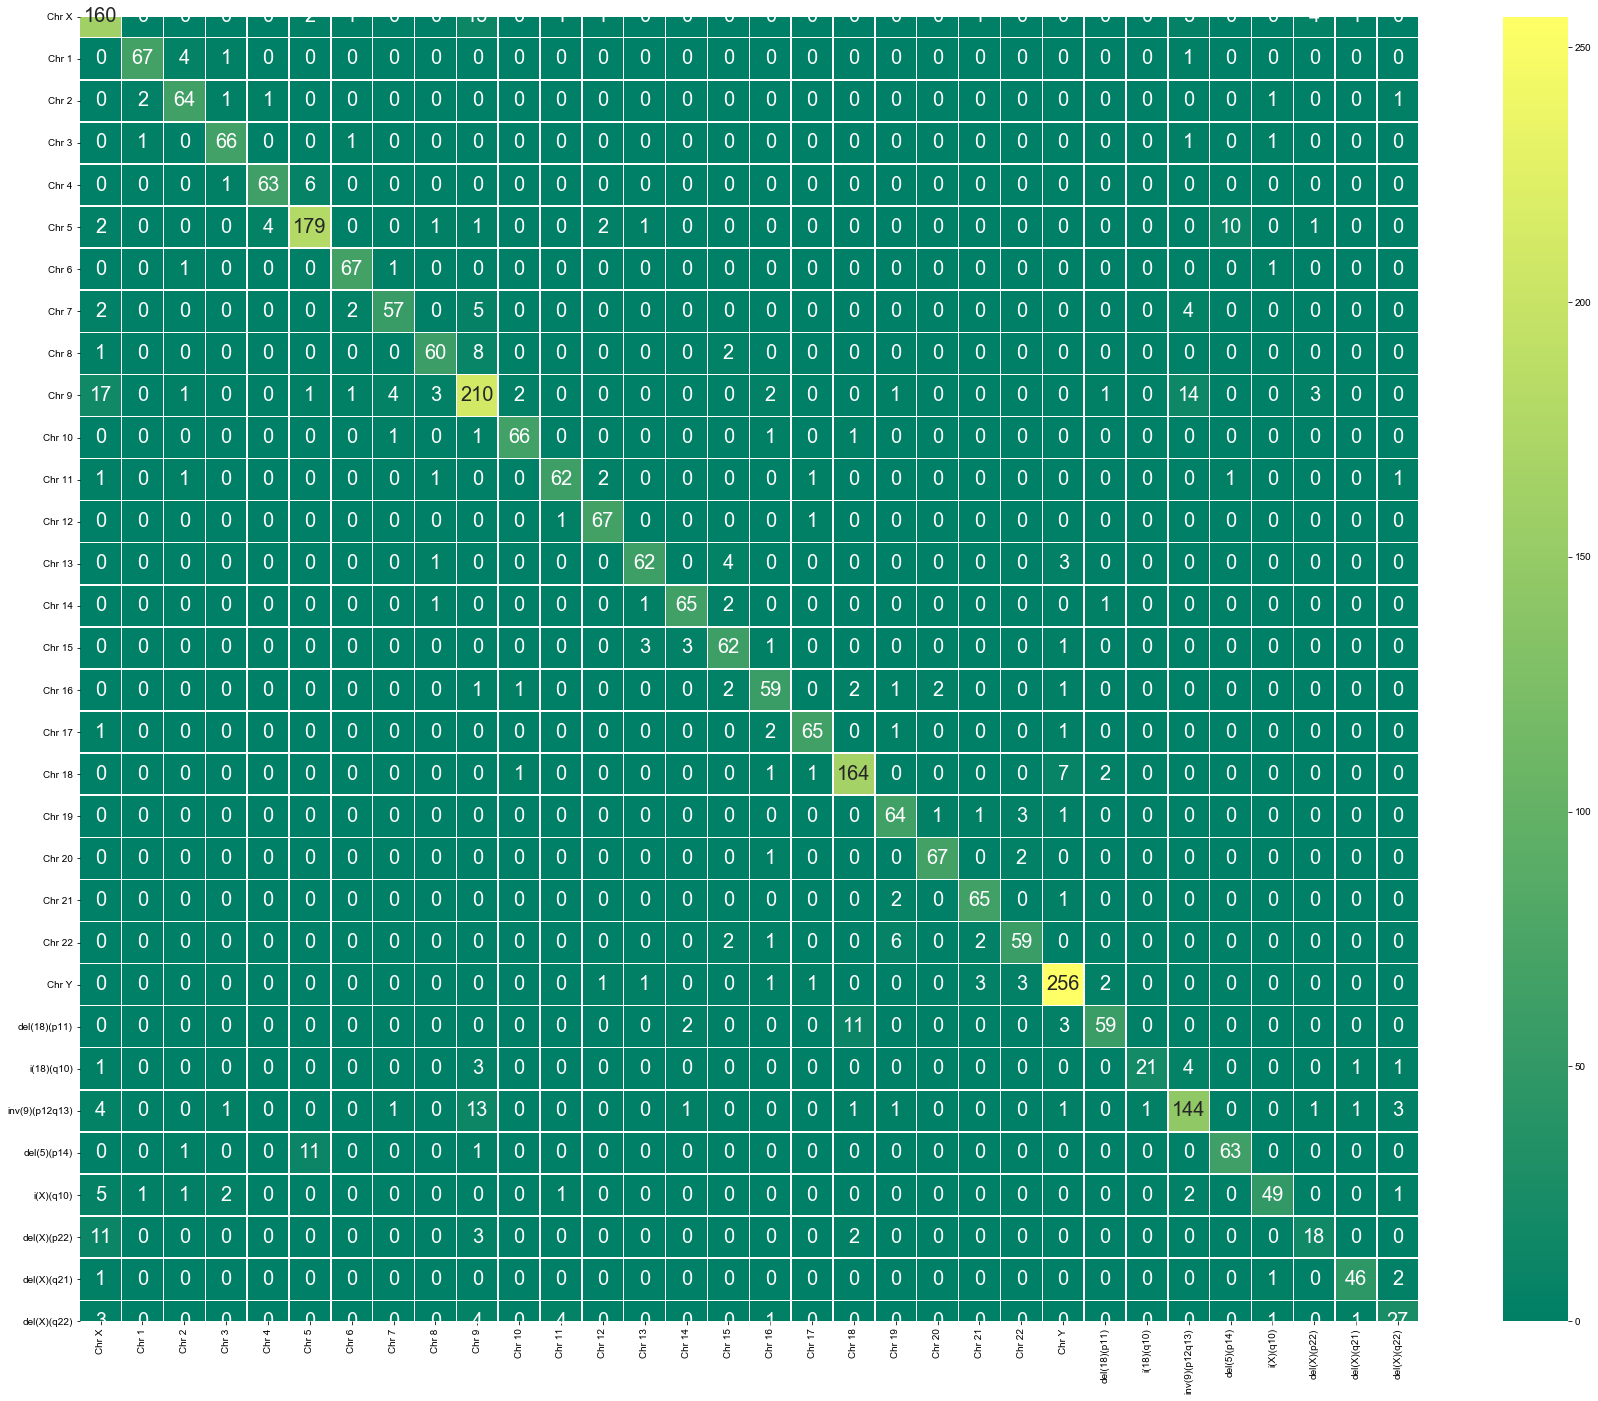

In [22]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True, fmt = 'g', # It's a Seaborn function
                      cmap='summer', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

#### Heat Map of Recall: Rate (important!!!)

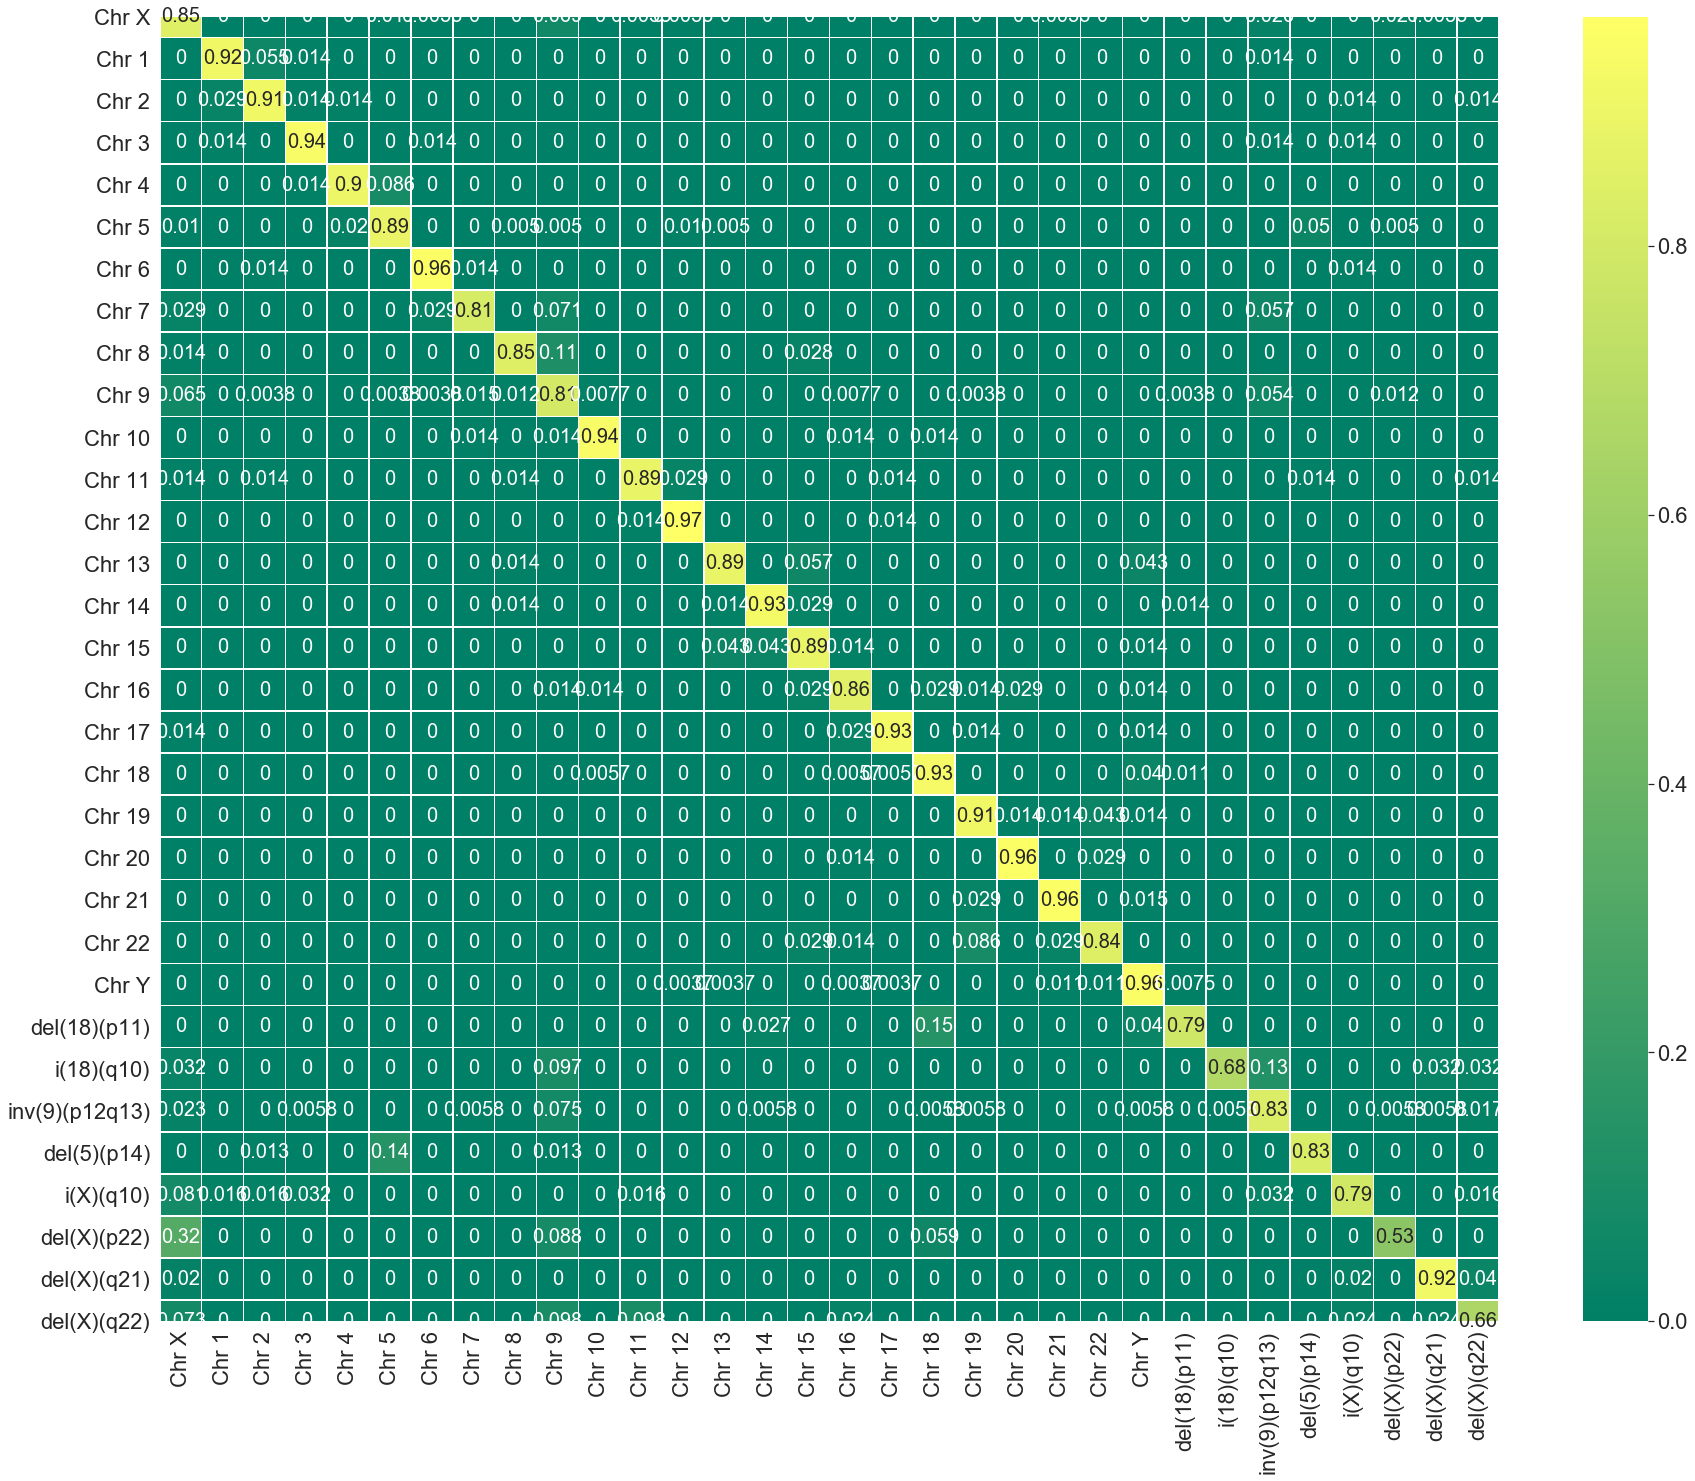

In [23]:
plt.figure(figsize=(30, 24))
heat_map_r = sb.heatmap(confusion_r, annot=True,  # It's a Seaborn function
                      cmap='summer', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

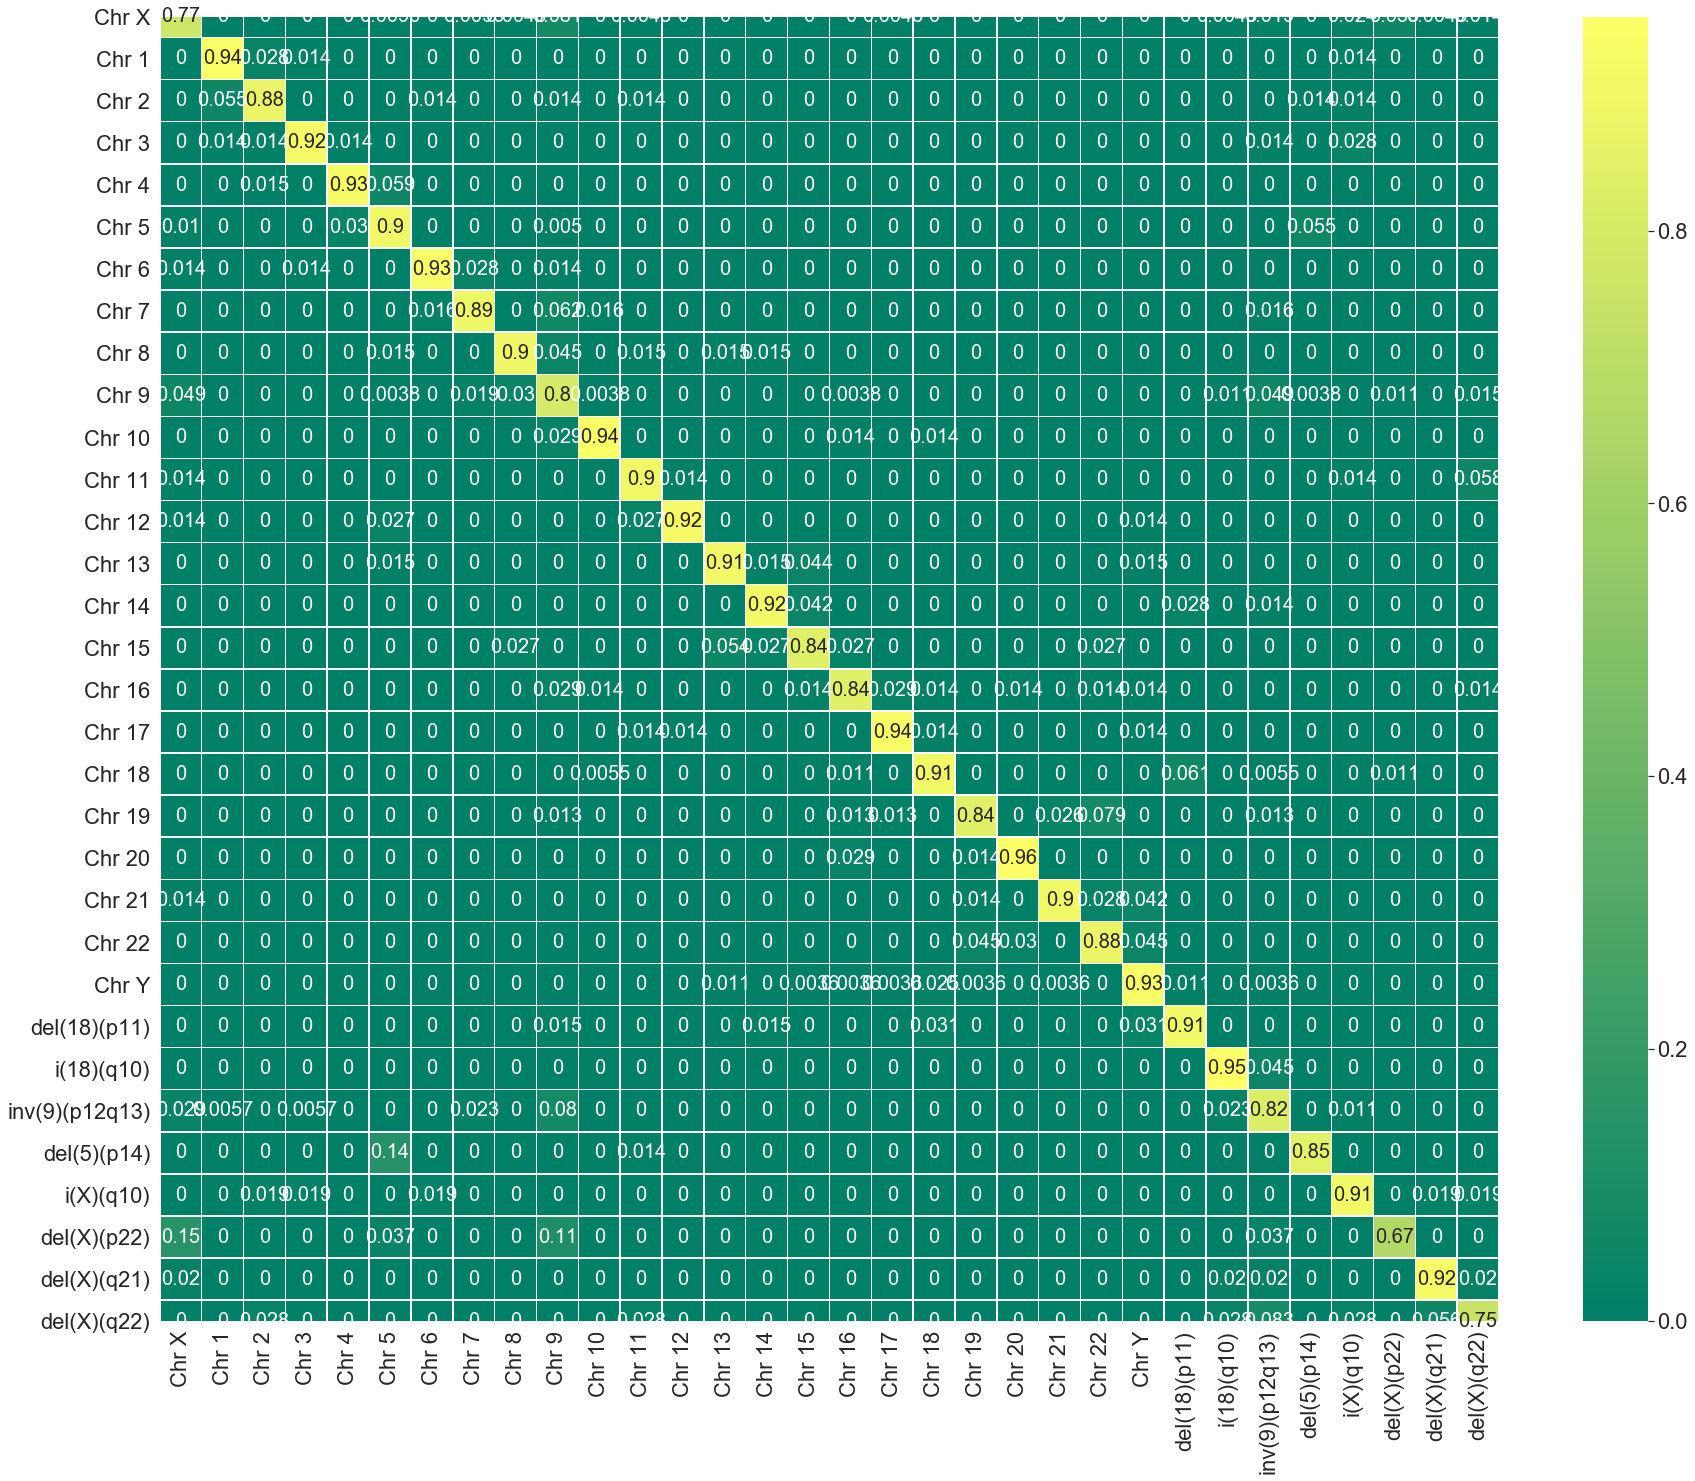

In [24]:
plt.figure(figsize=(30, 24))
heat_map_p = sb.heatmap(confusion_p, annot=True,  # It's a Seaborn function
                      cmap='summer', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [25]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Combination.png', dpi=400)

In [26]:
fig_r = heat_map_r.get_figure()    
fig_r.savefig('Heatmap_Recall_Combination.png', dpi=400)

In [27]:
fig_p = heat_map_p.get_figure()    
fig_p.savefig('Heatmap_Precision_Combination.png', dpi=400)

MemoryError: In RendererAgg: Out of memory